In [12]:
pip install sqlalchemy pandas matplotlib seaborn pyodbc

Note: you may need to restart the kernel to use updated packages.


Sales Data:
    Order_Date      Sales_person Sub_Category  Quantity    Sales  Commission  \
0   2024-05-01     Sophia Martin  Accessories         5    48.90        4.40   
1   2024-05-01        John Smith     Supplies         2     3.33        0.07   
2   2024-05-01     Robert Thomas       Tables         4   933.26       93.33   
3   2024-05-01     Robert Thomas       Chairs         5  2803.92      168.24   
4   2024-05-01     Michael Brown    Bookcases         3   314.35       40.87   
5   2024-05-01     Michael Brown       Labels         2     4.61        0.05   
6   2024-05-02  Matthew Thompson  Furnishings         3   129.93       10.39   
7   2024-05-02     Robert Thomas  Accessories         4   159.56       14.36   
8   2024-05-02       Chuck Magee        Paper         5    15.70        0.31   
9   2024-05-02      Laura Taylor          Art         3    59.52        4.76   
10  2024-05-02     Robert Thomas        Paper         5    34.40        0.69   

   Commission_Margin_Status

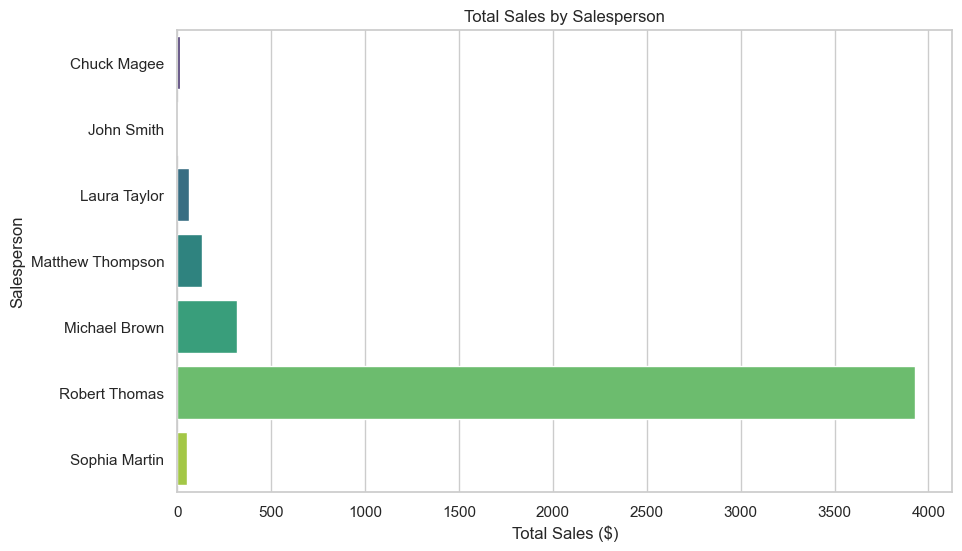

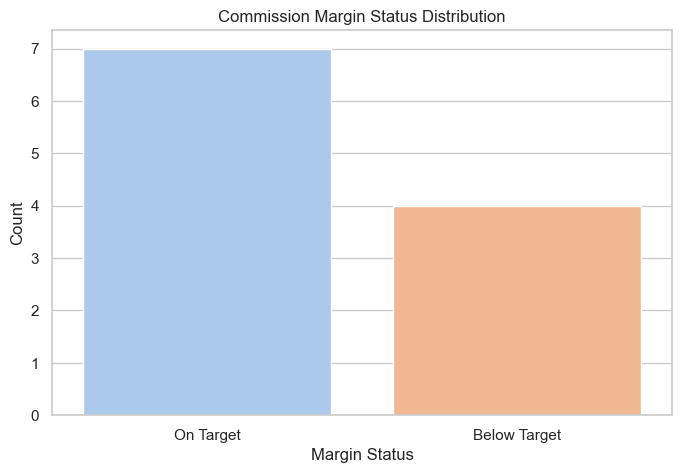

In [22]:
from sqlalchemy import create_engine
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Created by Todd Martin 9/2024
# Define the connection string
connection_string = (
    'mssql+pyodbc://MARTIN/HomeStore?driver=ODBC+Driver+17+for+SQL+Server'
)

# Create the engine
engine = create_engine(connection_string)

# Define the SQL query
query = """
SELECT Order_Date, Sales_person, Sub_Category, Quantity, Round(Sales, 2) as Sales, Round(Commission, 2) as Commission, Commission_Margin_Status
FROM dbo.Sales_orders
WHERE Order_Date BETWEEN '2024-05-01' AND '2024-05-02'
"""

# Execute the query and fetch the data into a DataFrame
df = pd.read_sql(query, engine)

# Display the DataFrame
print("Sales Data:")
print(df)

# Data Analysis
# Calculate total sales and average commission
total_sales = df['Sales'].sum()
average_commission = df['Commission'].mean()
sales_per_person = df.groupby('Sales_person')['Sales'].sum().reset_index()

print("\nTotal Sales: ${:.2f}".format(total_sales))
print("Average Commission: ${:.2f}".format(average_commission))
print("\nSales by Person:")
print(sales_per_person)

# Data Visualization
# Set the aesthetics for the plots
sns.set(style="whitegrid")

# Plot total sales by salesperson
plt.figure(figsize=(10, 6))
sns.barplot(x='Sales', y='Sales_person', data=sales_per_person, palette='viridis', hue='Sales_person', dodge=False, legend=False)
plt.title('Total Sales by Salesperson')
plt.xlabel('Total Sales ($)')
plt.ylabel('Salesperson')
plt.show()

# Plot Commission Margin Status Distribution
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='Commission_Margin_Status', palette='pastel', hue='Commission_Margin_Status', legend=False)
plt.title('Commission Margin Status Distribution')
plt.xlabel('Margin Status')
plt.ylabel('Count')
plt.show()

In [26]:
from sqlalchemy import create_engine
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Define the connection string
connection_string = 'mssql+pyodbc://MARTIN/HomeStore?driver=ODBC+Driver+17+for+SQL+Server'

# Create the engine
engine = create_engine(connection_string)

# Define the SQL query (without 'Order_Time')
query = """
SELECT 
    Order_Date, 
    Sales, 
    Quantity, 
    Discount, 
    Profit, 
    Price_per_unit, 
    Product_Cost, 
    Commission_Pct
FROM dbo.Sales_orders
"""

# Execute the query and fetch the data into a DataFrame
df = pd.read_sql(query, engine)

# Display the DataFrame
print("Sales Data:")
print(df)

# Convert 'Order_Date' to datetime format if needed
df['Order_Date'] = pd.to_datetime(df['Order_Date'])

# Convert 'Commission_Pct' from datetime.time to float (in hours)
def time_to_float(time_obj):
    """Convert a datetime.time object to a float representing hours."""
    if pd.isnull(time_obj):  # Handle NaN values
        return 0.0
    return time_obj.hour + time_obj.minute / 60.0 + time_obj.second / 3600.0

df['Commission_Pct'] = df['Commission_Pct'].apply(time_to_float)

# Proceed with further data analysis or model training...

# Define the features and target
X = df[['Sales', 'Quantity', 'Discount', 'Profit', 'Price_per_unit', 'Product_Cost', 'Commission_Pct']]
y = df['Profit']  # Adjust this based on your target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Calculate Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error: ", mse)

Sales Data:
      Order_Date       Sales  Quantity  Discount      Profit  Price_per_unit  \
0     2024-01-01   48.896000         4       0.2    8.560000       13.320000   
1     2024-01-01  474.429993        11       0.0  199.259995       47.009998   
2     2024-01-01    3.600000         2       0.0    1.730000        1.820000   
3     2024-01-01  454.559998         5       0.2 -107.959999      100.910004   
4     2024-01-01  141.419998         5       0.6 -187.380005       30.830000   
...          ...         ...       ...       ...         ...             ...   
3307  2024-12-30   90.930000         7       0.0    2.730000       13.250000   
3308  2024-12-30   52.776001         3       0.2   19.790001       17.770000   
3309  2024-12-30   13.904000         2       0.2    4.520000        7.020000   
3310  2024-12-30   20.719999         2       0.2    6.480000       10.460000   
3311  2024-12-30    3.024000         3       0.2   -0.600000        1.020000   

      Product_Cost Commissi

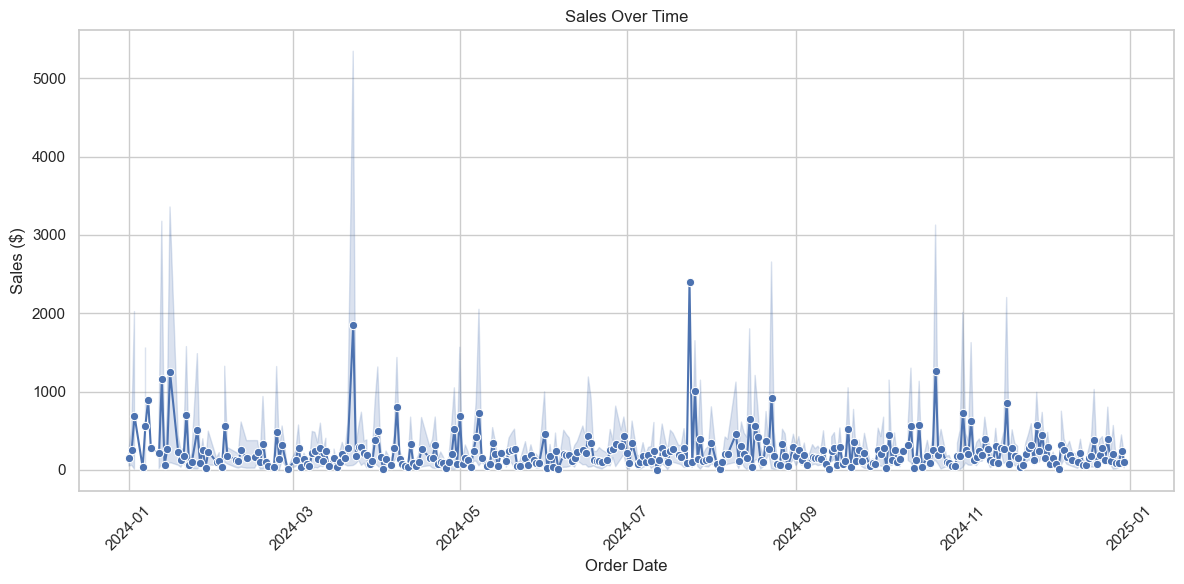

In [28]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='Order_Date', y='Sales', marker='o')
plt.title('Sales Over Time')
plt.xlabel('Order Date')
plt.ylabel('Sales ($)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

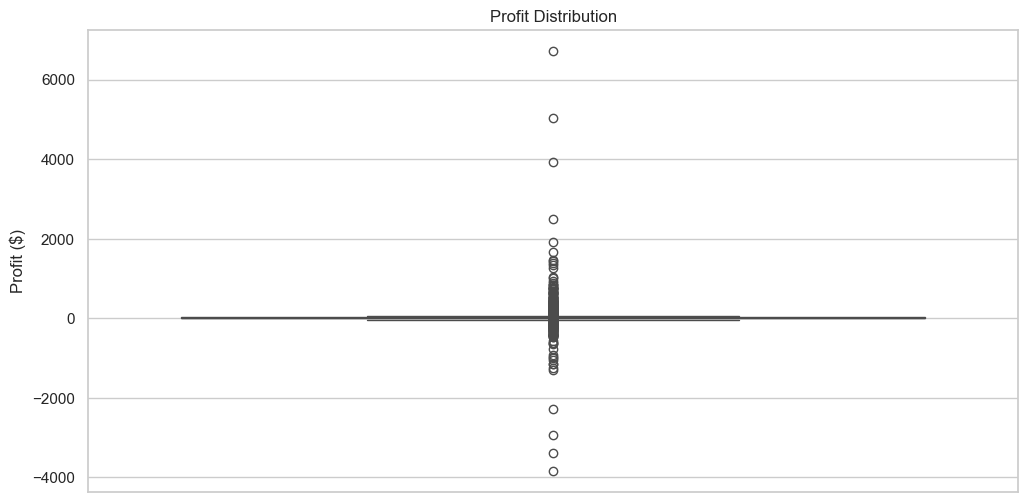

In [32]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, y='Profit')
plt.title('Profit Distribution')
plt.ylabel('Profit ($)')
plt.show()

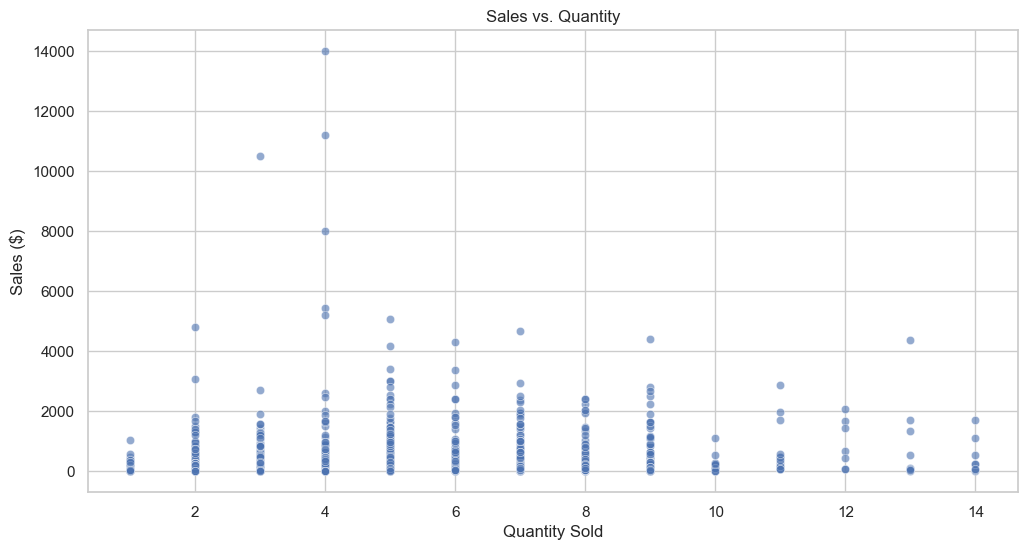

In [34]:
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df, x='Quantity', y='Sales', alpha=0.6)
plt.title('Sales vs. Quantity')
plt.xlabel('Quantity Sold')
plt.ylabel('Sales ($)')
plt.show()

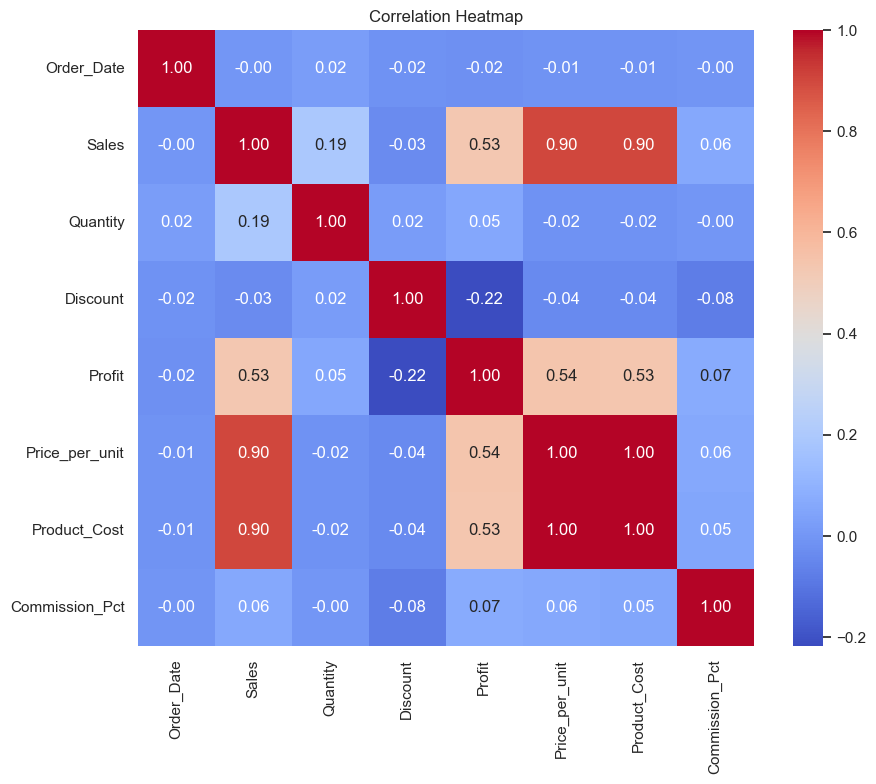

In [36]:
correlation_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title('Correlation Heatmap')
plt.show()

In [40]:
print(df.columns)

Index(['Order_Date', 'Sales', 'Quantity', 'Discount', 'Profit',
       'Price_per_unit', 'Product_Cost', 'Commission_Pct'],
      dtype='object')


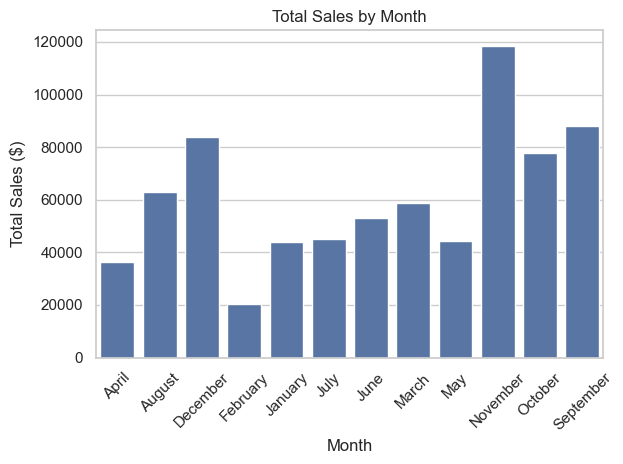

In [46]:
sns.barplot(data=monthly_sales, x='O_Month', y='Sales')

plt.title('Total Sales by Month')
plt.xlabel('Month')
plt.ylabel('Total Sales ($)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()